<a href="https://colab.research.google.com/github/pedrofigueroaalbano/IS-4487/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 4 Script

## Objectives

*   Deal with nulls
*   Standardize/transform attributes
*   Convert attributes to factors (categories)
*   Encode attributes

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [2]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/retail_dataset.csv')

Mounted at /content/gdrive


In [4]:
#describe the data before cleaning it
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   object 
 16  order_year_month  9312 non-null   object 


# Which attributes have empty/null values?

These attributes: address_line_1, city, postal_code, order_date, quantity, total_amount, order_year_month, order_month


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   object 
 15  total_amount      9513 non-null   float64
 16  order_year_month  9312 non-null   object 


# Are there any nulls that can be corrected?

If you have the state and the city, you can fix the postal code. Also, if you have the address and the city you can fix the postal code. Or if you have the postal code and state, you can fix the city.

If you have two out of the three attributes quantity, price, and total amount, you can fix the third data point with the other two.

Finally, date can be used to fix order_year_month and order_month, and order_year_month can be used to correct order_month

# Plot the total number of orders and revenue by state.

<AxesSubplot:xlabel='state_province'>

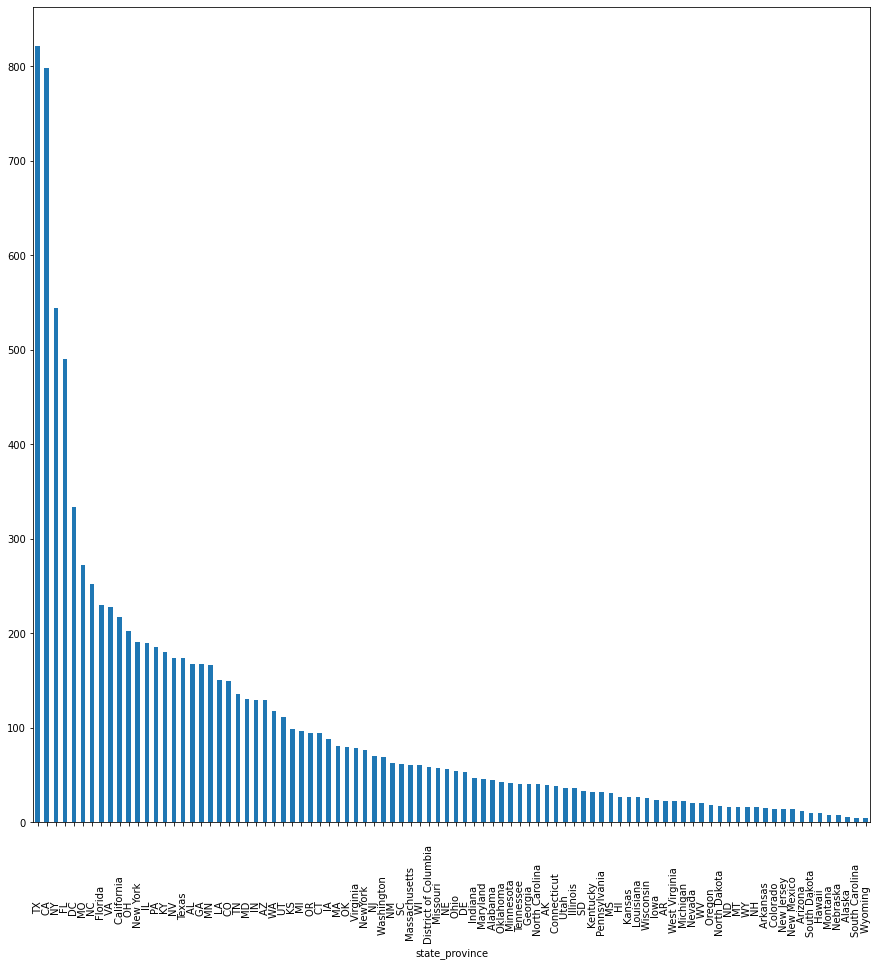

In [26]:
grouped_df = df.groupby(['state_province'])['order_id'].count()
grouped_df.sort_values(ascending=False).plot(kind="bar", figsize=(15,15))

# Clean total amount

In [32]:
cleaned_df = df
cleaned_df['total_amount'] = df['total_amount'].str.replace('$','')
cleaned_df['total_amount'] = cleaned_df['total_amount'].str.replace(',','')
cleaned_df['total_amount'] = cleaned_df['total_amount'].astype(float)

<ipython-input-32-c71b4ce466e9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cleaned_df['total_amount'] = df['total_amount'].str.replace('$','')


# Plot total_amount by state

<AxesSubplot:xlabel='state_province'>

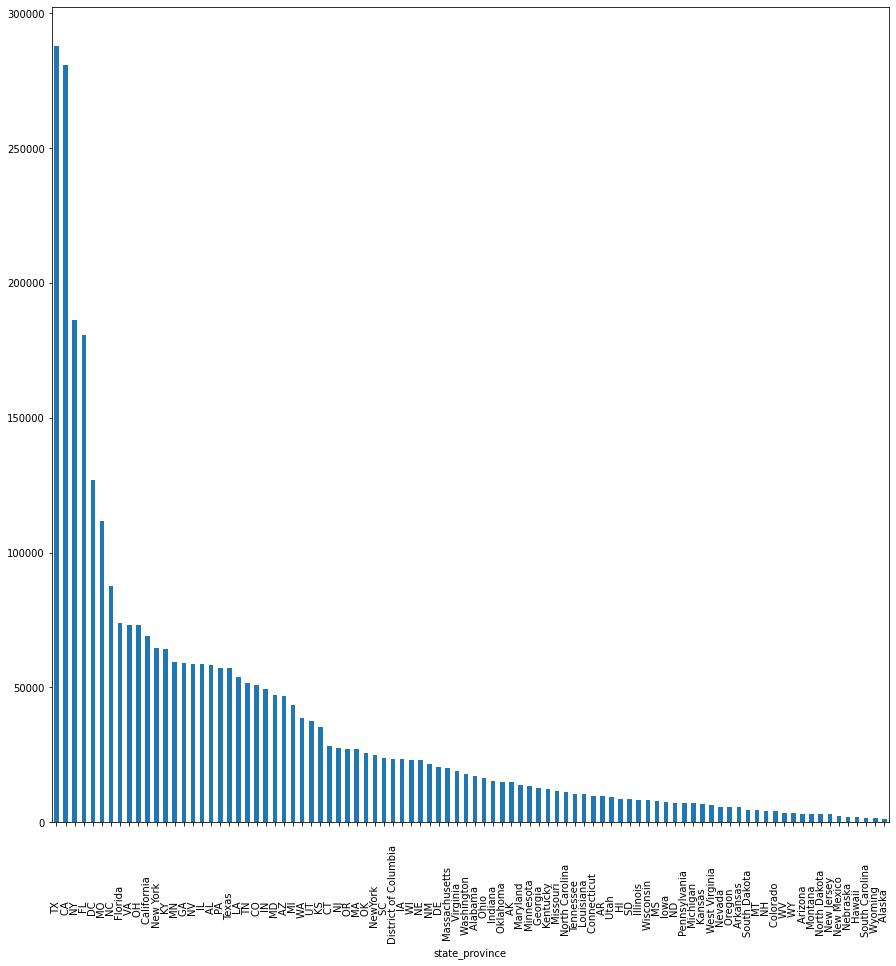

In [34]:
grouped_df2 = df.groupby(['state_province'])['total_amount'].sum()
grouped_df2.sort_values(ascending=False).plot(kind="bar", figsize=(15,15))

# How many customers have complete addresses?

9448 Customers have enough address information to send something to their home. 9416 have all the address information.

# Fix the issues with the customer state_province

In [36]:
df2 = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/customer_state_mapping.csv')
df_fixed = df